# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [2]:
import numpy as np
import pandas as pd
cars_data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [4]:
cars_data.head(7)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0


In [5]:
#check if there are empty cells#
cars_data.isnull().any()


car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [6]:
cars_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labelencoder = LabelEncoder()
cars_data['fueltype'] = labelencoder.fit_transform(cars_data['fueltype'])
cars_data['aspiration'] = labelencoder.fit_transform(cars_data['aspiration'])
cars_data['doornumber'] = labelencoder.fit_transform(cars_data['doornumber'])
cars_data['carbody'] = labelencoder.fit_transform(cars_data['carbody'])
cars_data['drivewheel'] = labelencoder.fit_transform(cars_data['drivewheel'])
cars_data['enginelocation'] = labelencoder.fit_transform(cars_data['enginelocation'])
cars_data['enginetype'] = labelencoder.fit_transform(cars_data['enginetype'])
cars_data['cylindernumber'] = labelencoder.fit_transform(cars_data['cylindernumber'])
cars_data['fuelsystem'] = labelencoder.fit_transform(cars_data['fuelsystem'])

In [9]:
cars_data.head(7)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.40,8.5,110,5500,19,25,15250.0
6,7,1,audi 100ls,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,5,3.19,3.40,8.5,110,5500,19,25,17710.0


In [10]:
cars_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
cars_data.drop(columns=['car_ID','symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation','enginetype', 'cylindernumber', 'fuelsystem' ], inplace = True)

In [12]:
cars_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
ready_data = cars_data

In [14]:
ready_data.shape

(205, 14)

In [15]:
x = (ready_data.loc[:,ready_data.columns != 'price'])
y = (ready_data.loc[:,ready_data.columns == 'price'])

In [16]:
x.shape

(205, 13)

In [17]:
y.shape

(205, 1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=42)

In [19]:
x_train.shape

(143, 13)

In [20]:
x_test.shape

(62, 13)

In [21]:
x.mean = x_train.mean(axis=0)
x_train -= x.mean
x.std = x_train.std(axis=0)
x_train /= x.std
x_test -= x.mean
x_test /= x.std

In [22]:
x.mean

wheelbase             98.930070
carlength            174.655245
carwidth              65.988811
carheight             53.791608
curbweight          2573.237762
enginesize           127.013986
boreratio              3.320559
stroke                 3.257552
compressionratio       9.983986
horsepower           105.699301
peakrpm             5154.545455
citympg               24.818182
highwaympg            30.321678
dtype: float64

In [23]:
x.std

wheelbase             6.073737
carlength            12.407288
carwidth              2.181939
carheight             2.480075
curbweight          522.368306
enginesize           41.436526
boreratio             0.272339
stroke                0.307434
compressionratio      3.745026
horsepower           40.343950
peakrpm             487.191907
citympg               5.915647
highwaympg            6.232131
dtype: float64

In [24]:
y.mean = y_train.mean(axis=0)
y_train -= y.mean
y.std = y_train.std(axis=0)
y_train /= y.std
y_test -= y.mean
y_test /= y.std

In [25]:
y.mean

price    13408.503497
dtype: float64

In [26]:
y.std

price    7834.464872
dtype: float64

In [27]:
x_train.shape

(143, 13)

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model(abc):
    model = models.Sequential()
    model.add(layers.Dense(128, activation= abc , input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64, activation= abc ))
    model.add(layers.Dense(32, activation= abc ))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [29]:
build_model

<function __main__.build_model>

In [30]:
build_model('relu').summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [31]:
build_model('tanh').summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


**k fold validation with relu**


In [32]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []

In [33]:
all_mae_histories_relu = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model('relu')
    history_relu =model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    mae_history_relu = history_relu.history['mae']
    all_mae_histories_relu.append(mae_history_relu)

processing fold # 0
Epoch 1/100
108/108 [==============================] - 1s 1ms/step - loss: 0.4275 - mae: 0.4929
Epoch 2/100
108/108 [==============================] - 0s 1ms/step - loss: 0.1473 - mae: 0.2691
Epoch 3/100
108/108 [==============================] - 0s 1ms/step - loss: 0.1095 - mae: 0.2137
Epoch 4/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0867 - mae: 0.2136
Epoch 5/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0622 - mae: 0.1766
Epoch 6/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0682 - mae: 0.1906
Epoch 7/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0696 - mae: 0.1888
Epoch 8/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0826 - mae: 0.1974
Epoch 9/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0311 - mae: 0.1278
Epoch 10/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0388 - mae: 0.1524
Epoch 11/100
108/10

In [34]:
average_mae_history_relu = [np.mean([x[i] for x in all_mae_histories_relu]) for i in range(num_epochs)]

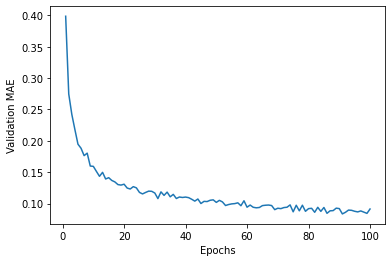

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history_relu) + 1), average_mae_history_relu)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# K fold function with **tahn**

In [36]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores_tahn = []

In [37]:
all_mae_histories_tanh = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model('tanh')
    history = model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores_tahn.append(val_mae)
    mae_history = history.history['mae']
    all_mae_histories_tanh.append(mae_history)

processing fold # 0
Epoch 1/100
108/108 [==============================] - 1s 1ms/step - loss: 0.7678 - mae: 0.6306
Epoch 2/100
108/108 [==============================] - 0s 1ms/step - loss: 0.3049 - mae: 0.4261
Epoch 3/100
108/108 [==============================] - 0s 1ms/step - loss: 0.2896 - mae: 0.4036
Epoch 4/100
108/108 [==============================] - 0s 1ms/step - loss: 0.2417 - mae: 0.3803
Epoch 5/100
108/108 [==============================] - 0s 1ms/step - loss: 0.1462 - mae: 0.2802
Epoch 6/100
108/108 [==============================] - 0s 1ms/step - loss: 0.2155 - mae: 0.3633
Epoch 7/100
108/108 [==============================] - 0s 1ms/step - loss: 0.1418 - mae: 0.2753
Epoch 8/100
108/108 [==============================] - 0s 1ms/step - loss: 0.1181 - mae: 0.2722
Epoch 9/100
108/108 [==============================] - 0s 1ms/step - loss: 0.1835 - mae: 0.3153
Epoch 10/100
108/108 [==============================] - 0s 1ms/step - loss: 0.1076 - mae: 0.2467
Epoch 11/100
108/10

In [38]:
average_mae_history_tanh = [np.mean([x[i] for x in all_mae_histories_tanh]) for i in range(num_epochs)]

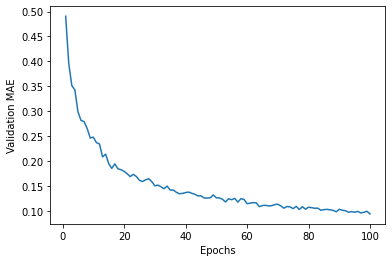

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history_tanh) + 1), average_mae_history_tanh)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [40]:
# Regularized model
from tensorflow.keras import regularizers
def build_model_regular(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [41]:
build_model_regular('tanh').summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_42 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 7         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


# K fold function with **regularizer**

In [42]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores_regul = []

In [44]:
all_mae_histories_regul = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model('tanh')
    history_regul = model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores_regul.append(val_mae)
    mae_history_regul = history_regul.history['mae']
    all_mae_histories_regul.append(mae_history_regul)

processing fold # 0
2/2 [==============================] - 0s 12ms/step - loss: 0.1010 - mae: 0.2645
processing fold # 1
2/2 [==============================] - 0s 6ms/step - loss: 0.2669 - mae: 0.3514
processing fold # 2
2/2 [==============================] - 0s 6ms/step - loss: 0.4463 - mae: 0.3821
processing fold # 3
2/2 [==============================] - 0s 8ms/step - loss: 0.2261 - mae: 0.3303


In [45]:
average_mae_history_regul = [np.mean([x[i] for x in all_mae_histories_regul]) for i in range(num_epochs)]

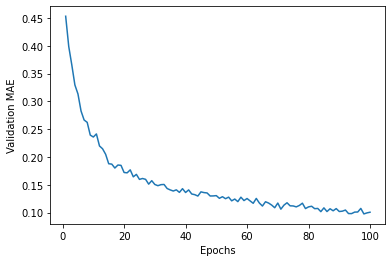

In [46]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history_regul) + 1), average_mae_history_regul)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [47]:
# dropout model
from tensorflow.keras import regularizers
def build_model_drop(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,input_shape=(x_train.shape[1],)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(8, activation= act))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(6, activation= act))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [48]:
build_model_drop('relu').summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 10)                140       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_78 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_79 (Dense)             (None, 1)               

# K fold function with **dropout**

In [49]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores_drop = []

In [50]:
all_mae_histories_drop = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model('relu')
    history_drop = model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores_drop.append(val_mae)
    mae_history_drop = history_drop.history['mae']
    all_mae_histories_drop.append(mae_history_drop)

processing fold # 0
Epoch 1/100
108/108 [==============================] - 1s 1ms/step - loss: 0.8769 - mae: 0.5743
Epoch 2/100
108/108 [==============================] - 0s 1ms/step - loss: 0.2671 - mae: 0.3388
Epoch 3/100
108/108 [==============================] - 0s 1ms/step - loss: 0.1711 - mae: 0.2906
Epoch 4/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0941 - mae: 0.2144
Epoch 5/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0976 - mae: 0.2252
Epoch 6/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0778 - mae: 0.1803
Epoch 7/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0877 - mae: 0.1923
Epoch 8/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0524 - mae: 0.1608
Epoch 9/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0804 - mae: 0.1927
Epoch 10/100
108/108 [==============================] - 0s 1ms/step - loss: 0.0433 - mae: 0.1282
Epoch 11/100
108/10

In [51]:
average_mae_history_drop = [np.mean([x[i] for x in all_mae_histories_drop]) for i in range(num_epochs)]

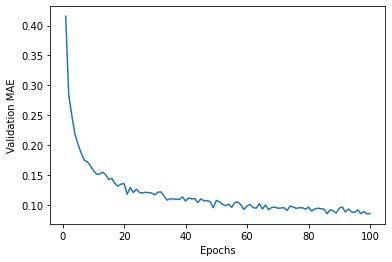

In [52]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history_drop) + 1), average_mae_history_drop)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [53]:
model_tanh = build_model('tanh')
model_tanh.fit(x_train, y_train,epochs= 100, batch_size=1, verbose=1)
test_mse_score, test_mae_score = model_tanh.evaluate(x_test, y_test)

Epoch 1/100
143/143 [==============================] - 1s 1ms/step - loss: 0.4425 - mae: 0.5195
Epoch 2/100
143/143 [==============================] - 0s 1ms/step - loss: 0.2672 - mae: 0.3735
Epoch 3/100
143/143 [==============================] - 0s 987us/step - loss: 0.2316 - mae: 0.3362
Epoch 4/100
143/143 [==============================] - 0s 1ms/step - loss: 0.1664 - mae: 0.2913
Epoch 5/100
143/143 [==============================] - 0s 1ms/step - loss: 0.1284 - mae: 0.2668
Epoch 6/100
143/143 [==============================] - 0s 1ms/step - loss: 0.1364 - mae: 0.2806
Epoch 7/100
143/143 [==============================] - 0s 1ms/step - loss: 0.1729 - mae: 0.2895
Epoch 8/100
143/143 [==============================] - 0s 1ms/step - loss: 0.1082 - mae: 0.2601
Epoch 9/100
143/143 [==============================] - 0s 1ms/step - loss: 0.0742 - mae: 0.2014
Epoch 10/100
143/143 [==============================] - 0s 1ms/step - loss: 0.1122 - mae: 0.2627
Epoch 11/100
143/143 [===============

In [54]:
model_relu = build_model('relu')
model_relu.fit(x_train, y_train,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(x_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.2377 - mae: 0.2557


In [55]:
model_regular = build_model_regular('relu')
model_regular.fit(x_train, y_train,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regular.evaluate(x_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.2512 - mae: 0.2490


In [56]:
model_drop = build_model_drop('relu')
model_drop.fit(x_train, y_train,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_drop.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4968 - mae: 0.3900
